In [48]:
import pandas as pd
import re
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

In [37]:
#import data from Comparative Agendas Project
#the dictionary for the data is here: 
#https://minio.la.utexas.edu/compagendas/codebookfiles/NYT_Front_Page_Policy_Agendas_Codebook_Updated_with_new_CAP_Codes.pdf
url = 'https://minio.la.utexas.edu/compagendas/adhocfiles/Boydstun_NYT_FrontPage_Dataset_1996-2006_0_PAP2014_recoding_wmanual_full.csv'

cap_nyt = pd.read_csv(url, encoding="latin1")

cap_nyt.head()

,article_id,date,title,summary,topic_2digit,topic_4digit,topic_6digit,CAPtopic_2digit,CAPtopic_4digit,CAPtopic_6digit,...,waronterror,katrina,israelpalestine,immigration,presidentialelections,clintonimpeachment,enron,darfur,raceethnicity,schiavo
0,7662,8/10/98,Talks Are Pressed to End Strike By Phone Worke...,Talks held to end phone workers strike,5,504,50400,17,1706,170600,...,0,0,0,0,0,0,0,0,0,0
1,28483,12/21/05,Pensions Were Last Sticking Point,NYC transit strike,5,504,50400,10,1000,100000,...,0,0,0,0,0,0,0,0,0,0
2,2581,11/17/96,"Once Again, the Hoffa Name Rouses the Teamster...",teamsters union,5,504,50400,10,1006,100600,...,0,0,0,0,0,0,0,0,0,0
3,28531,12/28/05,TRANSIT WORKERS IN DEAL TO SHARE HEALTH PLAN COST,NYC transit workers' strike settlement,5,504,50400,10,1000,100000,...,0,0,0,0,0,0,0,0,0,0
4,19942,10/9/02,PRESIDENT INVOKES TAFT-HARTLEY ACT TO OPEN 29 ...,Taft-Hartley Act invoked to reopen closed ports,5,504,50400,10,1007,100700,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(cap_nyt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31034 entries, 0 to 31033
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   article_id              31034 non-null  int64  
 1   date                    31034 non-null  object 
 2   title                   31031 non-null  object 
 3   summary                 30976 non-null  object 
 4   topic_2digit            31034 non-null  int64  
 5   topic_4digit            31034 non-null  int64  
 6   topic_6digit            31034 non-null  int64  
 7   CAPtopic_2digit         31034 non-null  int64  
 8   CAPtopic_4digit         31034 non-null  int64  
 9   CAPtopic_6digit         31034 non-null  int64  
 10  manually_recode         31034 non-null  int64  
 11  recoded                 0 non-null      float64
 12  keyword_animal          77 non-null     float64
 13  keyword_domestic        77 non-null     float64
 14  keyword_welfare         77 non-null   

In [39]:
#clean the main variables
def clean_text(text):
    if isinstance(text, str):
        #Remove numbers
        text = re.sub(r"[0-9]", "", text)
        #Use white space instead of - or --
        text = re.sub(r"-", " ", text)
        text = re.sub(r"[-—]", " ", text)
        # Remove punctuation and _
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r"_", "", text)
        
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text)

        # Convert to lowercase
        text = text.lower()
                
    return text

cap_nyt['title_clean'] = cap_nyt['title'].apply(clean_text)
cap_nyt['summary_clean'] = cap_nyt['summary'].apply(clean_text)
cap_nyt['date'] = cap_nyt['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').date())
cap_nyt = cap_nyt[['article_id','date','title','title_clean','summary','summary_clean','topic_2digit',
                 'topic_4digit','topic_6digit']]
cap_nyt.head()

,article_id,date,title,title_clean,summary,summary_clean,topic_2digit,topic_4digit,topic_6digit
0,7662,1998-08-10,Talks Are Pressed to End Strike By Phone Worke...,talks are pressed to end strike by phone worke...,Talks held to end phone workers strike,talks held to end phone workers strike,5,504,50400
1,28483,2005-12-21,Pensions Were Last Sticking Point,pensions were last sticking point,NYC transit strike,nyc transit strike,5,504,50400
2,2581,1996-11-17,"Once Again, the Hoffa Name Rouses the Teamster...",once again the hoffa name rouses the teamsters...,teamsters union,teamsters union,5,504,50400
3,28531,2005-12-28,TRANSIT WORKERS IN DEAL TO SHARE HEALTH PLAN COST,transit workers in deal to share health plan cost,NYC transit workers' strike settlement,nyc transit workers strike settlement,5,504,50400
4,19942,2002-10-09,PRESIDENT INVOKES TAFT-HARTLEY ACT TO OPEN 29 ...,president invokes taft hartley act to open ports,Taft-Hartley Act invoked to reopen closed ports,taft hartley act invoked to reopen closed ports,5,504,50400


The main variable of interest is topic_2digit. Below I assign the labels to the data as well, from the data dictionary by the Comparative Agendas Project

In [40]:
topic_dict = {
    1: "Macroeconomics",
    2: "Civil Rights, Minority Issues, and Civil Liberties",
    3: "Health",
    4: "Agriculture",
    5: "Labor and Employment",
    6: "Education",
    7: "Environment",
    8: "Energy",
    9: "Immigration",
    10: "Transportation",
    12: "Law, Crime, and Family Issues",
    13: "Social Welfare",
    14: "Community Development and Housing Issues",
    15: "Banking, Finance, and Domestic Commerce",
    16: "Defense",
    17: "Space, Science, Technology and Communications",
    18: "Foreign Trade",
    19: "International Affairs and Foreign Aid",
    20: "Government Operations",
    21: "Public Lands and Water Management",
    23: "Arts and Entertainment",
    24: "State and Local Government Administration",
    26: "Weather and Natural Disasters",
    27: "Fires",
    29: "Sports and Recreation",
    30: "Death Notices",
    31: "Churches and Religion",
    99: "Other, Miscellaneous, and Human Interest"
}

In [41]:
cap_nyt['topic_label'] = cap_nyt['topic_2digit'].map(topic_dict)
cap_nyt.head()

,article_id,date,title,title_clean,summary,summary_clean,topic_2digit,topic_4digit,topic_6digit,topic_label
0,7662,1998-08-10,Talks Are Pressed to End Strike By Phone Worke...,talks are pressed to end strike by phone worke...,Talks held to end phone workers strike,talks held to end phone workers strike,5,504,50400,Labor and Employment
1,28483,2005-12-21,Pensions Were Last Sticking Point,pensions were last sticking point,NYC transit strike,nyc transit strike,5,504,50400,Labor and Employment
2,2581,1996-11-17,"Once Again, the Hoffa Name Rouses the Teamster...",once again the hoffa name rouses the teamsters...,teamsters union,teamsters union,5,504,50400,Labor and Employment
3,28531,2005-12-28,TRANSIT WORKERS IN DEAL TO SHARE HEALTH PLAN COST,transit workers in deal to share health plan cost,NYC transit workers' strike settlement,nyc transit workers strike settlement,5,504,50400,Labor and Employment
4,19942,2002-10-09,PRESIDENT INVOKES TAFT-HARTLEY ACT TO OPEN 29 ...,president invokes taft hartley act to open ports,Taft-Hartley Act invoked to reopen closed ports,taft hartley act invoked to reopen closed ports,5,504,50400,Labor and Employment


In [42]:
#check the news with no topic labels
cap_nyt[cap_nyt['topic_label'].isna()]

,article_id,date,title,title_clean,summary,summary_clean,topic_2digit,topic_4digit,topic_6digit,topic_label
28223,30086,2006-08-14,Swept Away by an Unusual Destiny On the Fraugh...,swept away by an unusual destiny on the fraugh...,Review of Robert Wilson's Persephone,review of robert wilsons persephone,28,2800,280000,NaN
28224,27870,2005-09-17,"Ring Tones, Cameras, Now This: Sex Is Latest C...",ring tones cameras now this sex is latest cell...,Porn on cellphones,porn on cellphones,28,2800,280000,NaN
28225,18890,2002-06-05,"Curse of the Jaded Audience: Woody Allen, in A...",curse of the jaded audience woody allen in art...,Woody Allen,woody allen,28,2800,280000,NaN
28226,15621,2001-04-30,New Reality Show Planning To Put Ads Between t...,new reality show planning to put ads between t...,Reality show will bring revenue beyond standar...,reality show will bring revenue beyond standar...,28,2800,280000,NaN
28227,30311,2006-09-17,"Alone With His Thoughts, and Perhaps a Bluefis...",alone with his thoughts and perhaps a bluefish...,Photo: man fishes in Hudson River,photo man fishes in hudson river,28,2800,280000,NaN
...,...,...,...,...,...,...,...,...,...,...
28987,9660,1999-04-21,SPECIAL TODAY: Museums,special today museums,museums,museums,28,2800,280000,NaN
28988,9921,1999-05-22,Honors and Encores,honors and encores,choreographer gets an honorary degree,choreographer gets an honorary degree,28,2800,280000,NaN
28989,21829,2003-05-27,Hot Dog? Hamburger? Snorkel?,hot dog hamburger snorkel,memorial day,memorial day,28,2800,280000,NaN
28990,18412,2002-04-06,"Oprah Will Curtail 'Book Club' Picks, And Auth...",oprah will curtail book club picks and authors...,Oprah's book club,oprahs book club,28,2800,280000,NaN


In [36]:
cap_nyt[cap_nyt['topic_label'].isna()].isna()]["topic_2digit"].unique()

array([28])

So, there are 769 rows where topics are coded as 28, but there are no corresponding labels in the data dictionary. The [dictionary](https://minio.la.utexas.edu/compagendas/codebookfiles/NYT_Front_Page_Policy_Agendas_Codebook_Updated_with_new_CAP_Codes.pdf), however, states that 28 was changed to 23 (page 27). Maybe there was a mistake and some articles were missed. It does look like the above topics belong to the "Culture and Entertainment" category. 

Let's check the rows where the topic is coded as 23 to see if the topics seem similar.

In [44]:
cap_nyt[cap_nyt['topic_2digit']==23].shape[0]

0

So, apparently, the topics haven't been recoded yet. Let's change the dictionary then.

In [47]:
topic_dict = {
    1: "Macroeconomics",
    2: "Civil Rights, Minority Issues, and Civil Liberties",
    3: "Health",
    4: "Agriculture",
    5: "Labor and Employment",
    6: "Education",
    7: "Environment",
    8: "Energy",
    9: "Immigration",
    10: "Transportation",
    12: "Law, Crime, and Family Issues",
    13: "Social Welfare",
    14: "Community Development and Housing Issues",
    15: "Banking, Finance, and Domestic Commerce",
    16: "Defense",
    17: "Space, Science, Technology and Communications",
    18: "Foreign Trade",
    19: "International Affairs and Foreign Aid",
    20: "Government Operations",
    21: "Public Lands and Water Management",
    28: "Arts and Entertainment",
    24: "State and Local Government Administration",
    26: "Weather and Natural Disasters",
    27: "Fires",
    29: "Sports and Recreation",
    30: "Death Notices",
    31: "Churches and Religion",
    99: "Other, Miscellaneous, and Human Interest"
}
cap_nyt['topic_label'] = cap_nyt['topic_2digit'].map(topic_dict)
cap_nyt[cap_nyt['topic_label'].isna()].shape[0]

0

We're good!

Let's check the distribution of the topics now

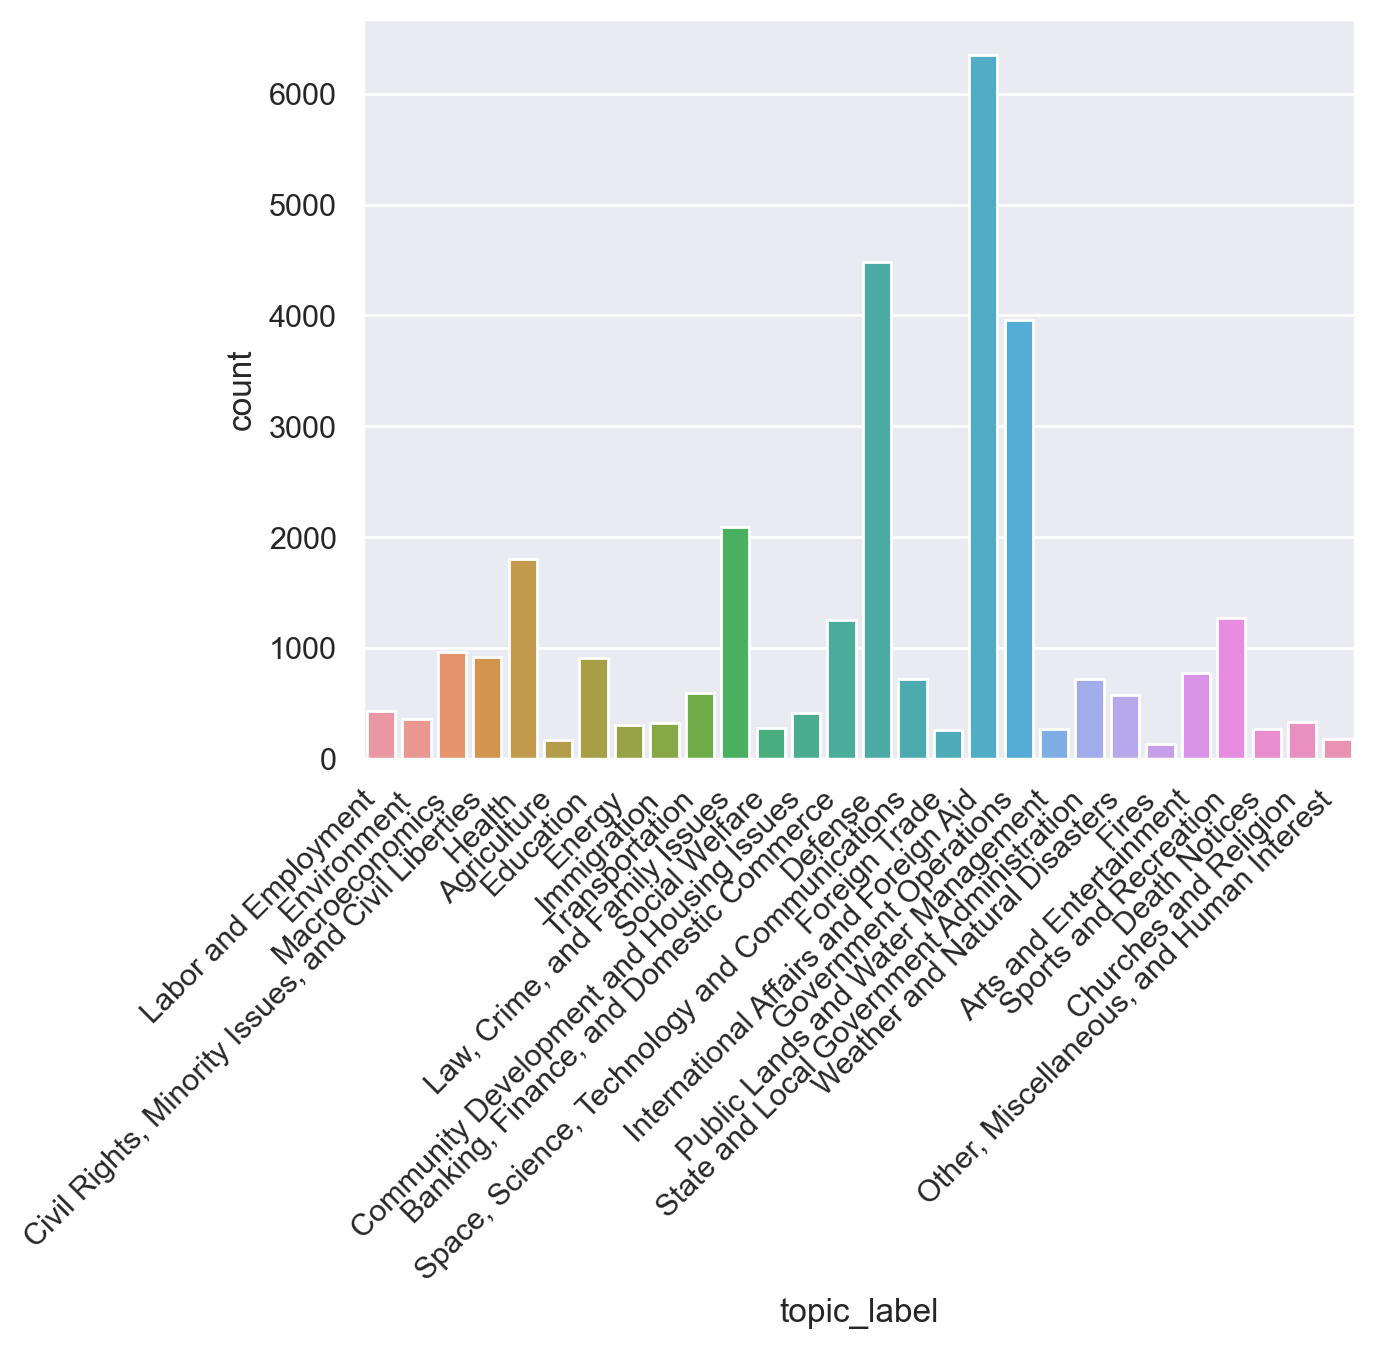

In [53]:
sns.countplot(x="topic_label", data=cap_nyt)

plt.xticks(rotation=45, ha='right')
plt.show()

In [54]:
cap_nyt["topic_label"].value_counts()

topic_label
International Affairs and Foreign Aid                 6354
Defense                                               4479
Government Operations                                 3958
Law, Crime, and Family Issues                         2088
Health                                                1799
Sports and Recreation                                 1273
Banking, Finance, and Domestic Commerce               1249
Macroeconomics                                         964
Civil Rights, Minority Issues, and Civil Liberties     914
Education                                              912
Arts and Entertainment                                 769
Space, Science, Technology and Communications          719
State and Local Government Administration              715
Transportation                                         594
Weather and Natural Disasters                          573
Labor and Employment                                   429
Community Development and Housing Issues    